### Danube Data Cube

The Danube Data Cube platform provides access to various environmental datasets, from satellite images to meteorologic and soil data, and delivers data integration and analysis tools. With a regional focus, it demonstrates how the data cube technology helps local actors maximize the benefit of the synergy of satellite and ancillary data. 

##### utility lib: https://pypi.org/project/ddc-utility/
##### documentation: https://doc.cropom.com/Python%20utility%20package.html

####
#### Part 1: Create and access data cubes.

1. Import the needed libs
2. Set DDC_CLIENT_ID and DDC_CLIENT_SECRET as env variables
3. Initialize the DDCClient

In [1]:
import os
import json
import pandas as pd
from ddc_utility.client import DdcClient

pd.set_option("display.max_rows", 10)

In [2]:
os.environ["DDC_CLIENT_ID"] = "auth0|6333f4972b827f142d3d418e"
os.environ["DDC_CLIENT_SECRET"] = "82a54623c832c3546271123c"

client = DdcClient()

4. Make sure to have a data cube with the data variables that are required for running the Crop Model API.

The miminum required layers are:

    - min_temp, max_temp, prec from Meteorlology dataset
    
    - hydcon, watcap, watwil, watcnt from Soil dataset
    
    - B04 and B08 from Sentinel-2 dataset

5. If you do not have a data cube that contains the required set of data variables, then you can create one easily. We provided the above mentioned data variable sets as prepared 'layer selections' for crop modelling. The layer_selection_id for HU is 2, and for AT is 67. Find an example in the code block below.

In [3]:
geometry = "MultiPolygon (((18.08560969551235331 46.86772107489328221, 18.0809319229929919 46.87207063933603735, 18.08074953278025632 46.87263906395731539, 18.09645389890026124 46.88074515547633325, 18.10174586493670645 46.87578912739379433, 18.08560969551235331 46.86772107489328221)))"

create_resp = client.create_aoi(
    name="_Workshop-1",
    geometry=geometry,
    time_range=("2021-10-20", "2022-12-31"),
    layer_ids=[14, 15, 17, 18, 26, 32, 33, 34, 102, 104, 108, 114, 166, 170],
)

In [4]:
AOI_ID = create_resp.iloc[0].id

#### ! Important: Make sure that the status of the data cube 'ready', before opening it!
##### It takes approximately 5 minutes to get the data cube ready

In [14]:
client.get_aoi_by_id(AOI_ID)

,user_id,access_type,id,name,geometry,area,edc_collections,is_dynamic,created_at,start_date,end_date,status,zarr_id
0,auth0|6333f4972b827f142d3d418e,owner,20309,_Workshop-1,"{'type': 'MultiPolygon', 'coordinates': [[[[18...",102.19,"{'data_sources': [{'id': 2, 'name': 'Meteorolo...",False,2024-11-28 13:50:17,2021-10-20,2022-12-30,ready,20309_auth0|6333f4972b827f142d3d418e.zarr


In [15]:
client.get_aoi_by_id(AOI_ID).iloc[0]["status"]

'ready'

In [16]:
cube = client.open_aoi_cube(AOI_ID)

In [17]:
cube

<xarray.Dataset> Size: 307MB
Dimensions:      (time: 438, y: 170, x: 170, depth: 7)
Coordinates:
  * depth        (depth) float64 56B 0.0 5.0 15.0 30.0 60.0 100.0 200.0
    spatial_ref  int32 4B ...
  * time         (time) datetime64[ns] 4kB 2021-10-20 2021-10-21 ... 2022-12-31
  * x            (x) float64 1kB 4.936e+06 4.936e+06 ... 4.938e+06 4.938e+06
  * y            (y) float64 1kB 2.675e+06 2.675e+06 ... 2.673e+06 2.673e+06
Data variables: (12/15)
    B02          (time, y, x) float32 51MB dask.array<chunksize=(259, 170, 170), meta=np.ndarray>
    B04          (time, y, x) float32 51MB dask.array<chunksize=(259, 170, 170), meta=np.ndarray>
    B08          (time, y, x) float32 51MB dask.array<chunksize=(259, 170, 170), meta=np.ndarray>
    EVI          (time, y, x) float32 51MB dask.array<chunksize=(259, 170, 170), meta=np.ndarray>
    NDVI         (time, y, x) float32 51MB dask.array<chunksize=(259, 170, 170), meta=np.ndarray>
    SCL          (time, y, x) float32 51MB dask.array<chunksize=(259, 170, 170), meta=np.ndarray>
    ...           ...
    prec         (time) float32 2kB dask.array<chunksize=(438,), meta=np.ndarray>
    temp_max     (time) float32 2kB dask.array<chunksize=(438,), meta=np.ndarray>
    temp_min     (time) float32 2kB dask.array<chunksize=(438,), meta=np.ndarray>
    watcap       (depth, y, x) float32 809kB dask.array<chunksize=(7, 170, 170), meta=np.ndarray>
    watcnt       (depth, y, x) float32 809kB dask.array<chunksize=(7, 170, 170), meta=np.ndarray>
    watwil       (depth, y, x) float32 809kB dask.array<chunksize=(7, 170, 170), meta=np.ndarray>
Attributes:
    Conventions:        ACDD-1.3
    date_created:       2024-11-28T13:50:24+0000
    date_last_updated:  2024-11-28T13:50:24+0000
    institution:        CropOM-Hungary Ltd.
    product_version:    8.4.0
    source:             dynamic data cube service
    summary:            The dataset contains various data variables requested...
    title:              _Workshop-1

####
#### Part 2: Data Cube analytics

Plotting meteorological data

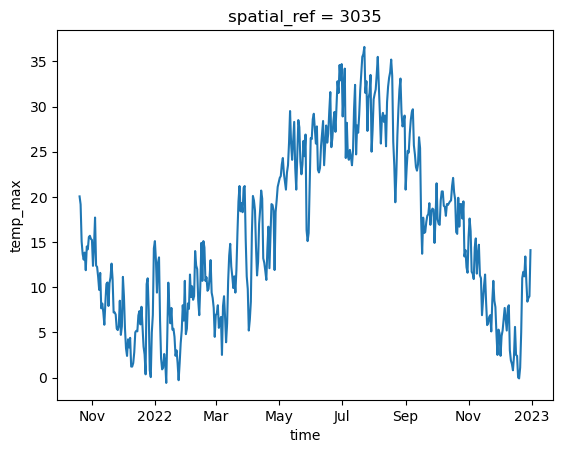

/opt/conda/envs/geo/lib/python3.11/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/opt/conda/envs/geo/lib/python3.11/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [18]:
cube.temp_max.plot()

Plotting EO data:
- pixel values of a date




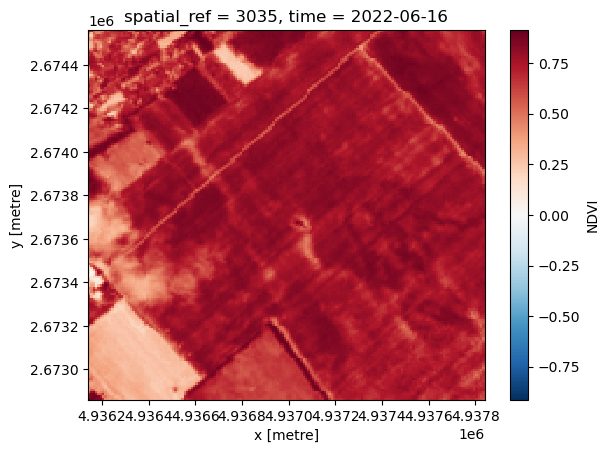

In [19]:
cube.NDVI[239].plot()

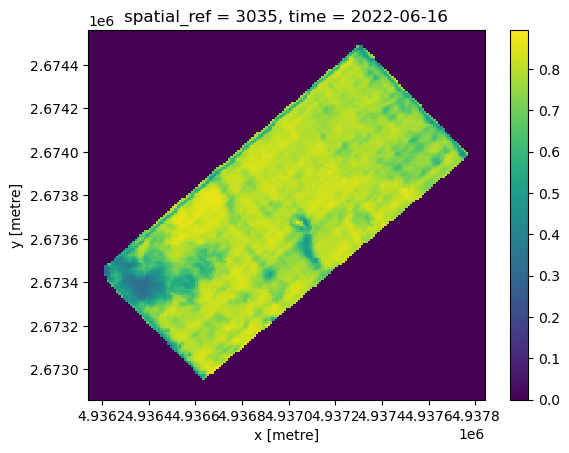

In [20]:
(cube.NDVI[239] * cube.aoi_mask).plot()

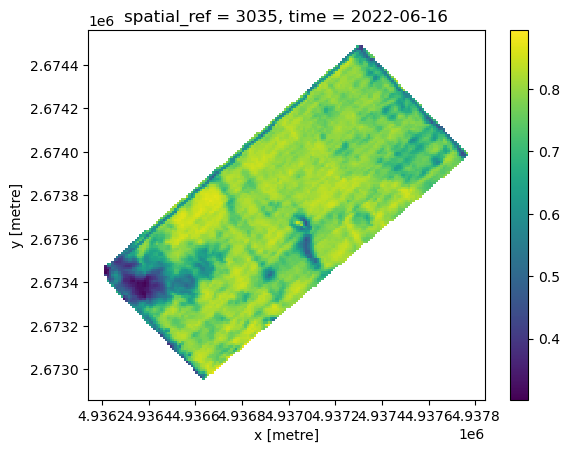

In [21]:
mask = cube.NDVI[239] * cube.aoi_mask
mask = mask.where(mask > 0.0)
mask.plot()

It is required to mask the data with the AOI gemoetry in order to produce accurate stats.

Check the difference!

In [22]:
# your code here...
# use the xarray .mean() function to produce mean values.
# https://docs.xarray.dev/en/latest/generated/xarray.DataArray.mean.html
# use the xarray .mean() function to produce mean values.
# https://docs.xarray.dev/en/latest/generated/xarray.DataArray.mean.html

Do some rater algebra!

In [23]:
# your code here...

- time series of average values

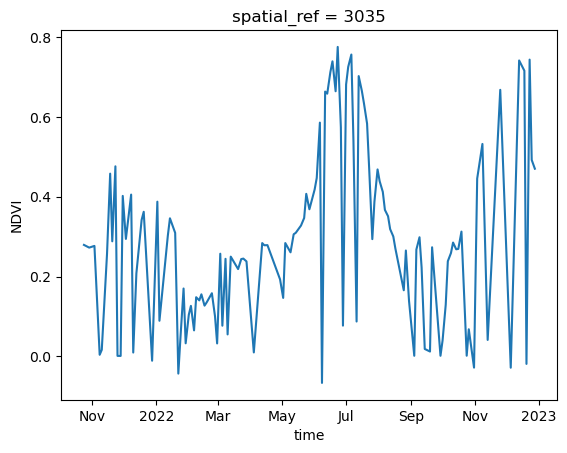

/opt/conda/envs/geo/lib/python3.11/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [24]:
cube.NDVI.mean(dim=["x", "y"]).dropna(dim="time").plot()

Clean time series with the helop of SCL layer

In [25]:
ndvi_mask = mask = cube.NDVI * cube.aoi_mask
ndvi_mask = ndvi_mask.where(ndvi_mask > 0.0)

In [26]:
scl_mask = cube.SCL * cube.aoi_mask
scl_mask = scl_mask.where(scl_mask > 0.0)

scl_series = scl_mask.mean(dim=["x", "y"]).dropna(dim="time")
scl_series_clean = scl_series.where((scl_series >= 4.0) & (scl_series <= 5.0))
scl_series_clean = scl_series_clean.dropna(dim="time")
scl_series_clean = scl_series_clean.astype(bool).astype(int)

scl_std = scl_mask.std(dim=["x", "y"]).dropna(dim="time")
scl_std_clean = scl_std * scl_series_clean
scl_std_clean = scl_std_clean.where((scl_std_clean < 0.4) & (scl_std_clean > 0.0))
scl_std_clean = scl_std_clean.dropna(dim="time")
final_clean = scl_std_clean.astype(bool).astype(int)

ndvi_series = ndvi_mask.mean(dim=["x", "y"]).dropna(dim="time")
ndvi_clean = ndvi_series * final_clean

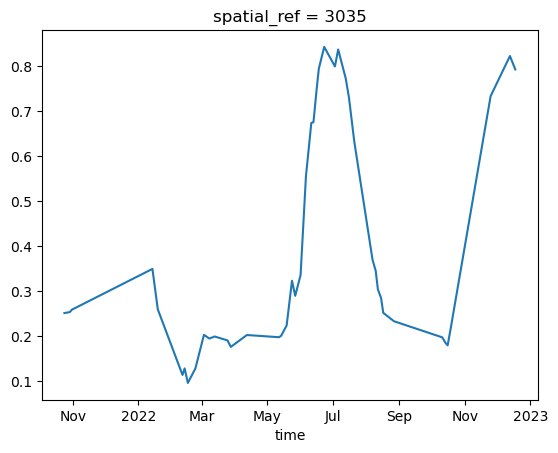

In [27]:
ndvi_clean.plot()

#### Part 3: Crop growth model
##### Online implementation of the FAO AquaCrop Model

In [28]:
model_results = client.run_crop_model(
    aoi_id=AOI_ID,
    time_range=("2022-04-10", "2022-10-30"),
    sowing_date="2022-04-10",
    crop_model_name="MaizeGDD",
    init_water_content=0.27,
)

In [29]:
model_results

,growth,final,units,simulation
0,"{'2022-04-10': {'time_step_counter': 0.0, 'sea...","{'season': {'value': 0, 'unit': 'Years'}, 'cro...","{'time_step_counter': 'Days', 'season_counter'...","{'is_sim': False, 'start': '', 'mode': ''}"


In [30]:
pd.DataFrame.from_dict(model_results.final[0])

,season,crop_type,harvest_date,harvest_date_step,yield_,fresh_yield,yield_pot,seasonal_irrigation
value,0,MaizeGDD,2022-08-17,128,4.225047,42.250465,6.01601,0
unit,Years,dimensionless,date,timestep,t/ha,t/ha,t/ha,mm


In [31]:
crop_growth = pd.DataFrame.from_dict(model_results.growth[0])

In [32]:
crop_growth = crop_growth.T

In [33]:
crop_growth = crop_growth[["yield_", "biomass"]]

In [34]:
crop_growth

,yield_,biomass
2022-04-10,0.000000,0.000000
2022-04-11,0.000000,0.000000
2022-04-12,0.000000,0.000000
2022-04-13,0.000000,0.000000
2022-04-14,0.000000,0.000000
...,...,...
2022-08-12,3.517485,1668.761567
2022-08-13,3.696533,1670.137673
2022-08-14,3.873748,1670.681221
2022-08-15,4.049708,1670.731768


<Axes: >

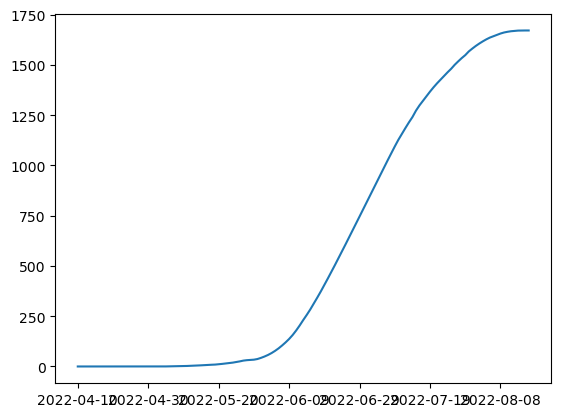

In [35]:
crop_growth["biomass"].plot()

##### Add irrigation to the model

In [36]:
model_results = client.run_crop_model(
    aoi_id=AOI_ID,
    time_range=("2022-04-10", "2022-10-30"),
    sowing_date="2022-04-10",
    crop_model_name="MaizeGDD",
    init_water_content=0.27,
    irrigation="(('2022-05-10',50),('2022-06-15',50),('2022-07-01',50))",
)
pd.DataFrame.from_dict(model_results.final[0])

,season,crop_type,harvest_date,harvest_date_step,yield_,fresh_yield,yield_pot,seasonal_irrigation
value,0,MaizeGDD,2022-09-13,155,12.317444,123.174445,14.015571,75.0
unit,Years,dimensionless,date,timestep,t/ha,t/ha,t/ha,mm


#### Appendix

I. List your AOIs / Data Cubes

In [37]:
client.get_all_aoi()

,user_id,access_type,id,name,geometry,area,edc_collections,is_dynamic,created_at,start_date,end_date,status,zarr_id
0,auth0|6333f4972b827f142d3d418e,owner,19858,Create teszt 01,"{'type': 'Polygon', 'coordinates': [[[20.84094...",17.77,"{'data_sources': [{'id': 2, 'name': 'Meteorolo...",False,2024-09-24 15:02:59,2023-01-01,2024-09-23,ready,19858_auth0|6333f4972b827f142d3d418e.zarr
1,auth0|6333f4972b827f142d3d418e,owner,19859,Teszt-1,"{'type': 'Polygon', 'coordinates': [[[20.84577...",37.11,"{'data_sources': [{'id': 67, 'name': 'S2L2A', ...",False,2024-09-24 15:06:55,2023-01-01,2024-09-23,ready,19859_auth0|6333f4972b827f142d3d418e.zarr
2,auth0|6333f4972b827f142d3d418e,owner,19863,TT-1,"{'type': 'Polygon', 'coordinates': [[[20.85767...",81.11,"{'data_sources': [{'id': 1, 'name': 'S2L2A', '...",False,2024-09-24 15:21:39,2023-01-01,2024-09-23,ready,19863_auth0|6333f4972b827f142d3d418e.zarr
3,auth0|6333f4972b827f142d3d418e,owner,19866,S2-1,"{'type': 'Polygon', 'coordinates': [[[19.82258...",34.41,"{'data_sources': [{'id': 67, 'name': 'S2L2A', ...",False,2024-09-24 15:39:59,2024-01-01,2024-09-23,ready,19866_auth0|6333f4972b827f142d3d418e.zarr
4,auth0|6333f4972b827f142d3d418e,owner,19870,R-AT-1,"{'type': 'Polygon', 'coordinates': [[[16.52797...",19.23,"{'data_sources': [{'id': 3, 'name': 'Soil', 't...",False,2024-09-24 16:28:47,2023-01-01,2024-09-23,ready,19870_auth0|6333f4972b827f142d3d418e.zarr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,auth0|6333f4972b827f142d3d418e,owner,20305,_Workshop-1,"{'type': 'MultiPolygon', 'coordinates': [[[[18...",102.19,"{'data_sources': [{'id': 2, 'name': 'Meteorolo...",False,2024-11-28 10:40:35,2022-10-20,2023-12-30,ready,20305_auth0|6333f4972b827f142d3d418e.zarr
38,auth0|6333f4972b827f142d3d418e,owner,20306,_Workshop-1,"{'type': 'MultiPolygon', 'coordinates': [[[[18...",102.19,"{'data_sources': [{'id': 2, 'name': 'Meteorolo...",False,2024-11-28 12:52:01,2022-10-20,2023-12-30,ready,20306_auth0|6333f4972b827f142d3d418e.zarr
39,auth0|6333f4972b827f142d3d418e,owner,20307,_Workshop-1,"{'type': 'MultiPolygon', 'coordinates': [[[[18...",102.19,"{'data_sources': [{'id': 2, 'name': 'Meteorolo...",False,2024-11-28 13:12:17,2022-10-20,2023-12-30,ready,20307_auth0|6333f4972b827f142d3d418e.zarr
40,auth0|6333f4972b827f142d3d418e,owner,20308,_Workshop-1,"{'type': 'MultiPolygon', 'coordinates': [[[[18...",102.19,"{'data_sources': [{'id': 2, 'name': 'Meteorolo...",False,2024-11-28 13:28:58,2021-10-20,2022-12-30,ready,20308_auth0|6333f4972b827f142d3d418e.zarr


II. List the available Crop types and Crop Models per Crop type

In [38]:
client.get_crop_types()

,id,name
0,4,Barley
1,6,Soybean
2,7,Canola
3,2,Maize
4,104,Cotton
...,...,...
10,110,Sugar cane
11,111,Sunflower
12,112,Tomato
13,113,Wheat


III. List the available Data layers

In [39]:
client.get_data_layers()

,id,layer,collection,provider
0,100,DEM30,DEM,Microsoft Planetary Computer
1,63,ecosystem_2016,Ecosystem,Lechner Knowledge Center
2,38,LAI,HR_VPP_DAILY,Sinergise
3,39,QFLAG2,HR_VPP_DAILY,Sinergise
4,36,NDVI,HR_VPP_DAILY,Sinergise
...,...,...,...,...
131,21,hyd_cur_alp,Soil,JOINT RESEARCH CENTRE
132,25,hyd_cur_ths,Soil,JOINT RESEARCH CENTRE
133,24,hyd_cur_thr,Soil,JOINT RESEARCH CENTRE
134,23,hyd_cur_n,Soil,JOINT RESEARCH CENTRE
